Epoch 10/100, Loss: 0.0821, Accuracy: 0.8500
Epoch 20/100, Loss: 0.0608, Accuracy: 0.9000
Epoch 30/100, Loss: 0.0414, Accuracy: 0.9583
Epoch 40/100, Loss: 0.0282, Accuracy: 0.9583
Epoch 50/100, Loss: 0.0225, Accuracy: 0.9583
Epoch 60/100, Loss: 0.0194, Accuracy: 0.9583
Epoch 70/100, Loss: 0.0175, Accuracy: 0.9583
Epoch 80/100, Loss: 0.0161, Accuracy: 0.9583
Epoch 90/100, Loss: 0.0152, Accuracy: 0.9667
Epoch 100/100, Loss: 0.0144, Accuracy: 0.9750


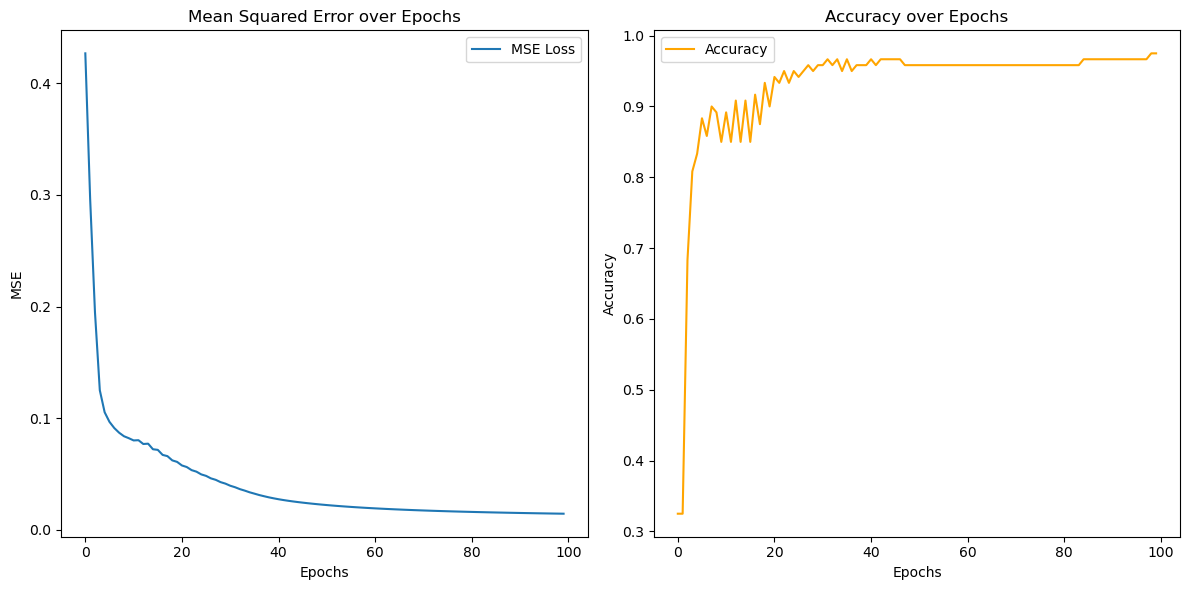

Test Accuracy: 1.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Load Iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Step 2: Preprocess the data
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert Y to one-hot encoding for classification
Y_one_hot = np.zeros((Y.size, 3))
Y_one_hot[np.arange(Y.size), Y] = 1

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

# Step 3: Initialize a Neural Network with random weights and bias
input_size = X.shape[1]  # 4 features
hidden_size = 10  # Arbitrary number of hidden neurons
output_size = Y_one_hot.shape[1]  # 3 classes (one-hot encoding)

np.random.seed(42)

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)  # weights for input to hidden layer
b1 = np.random.randn(hidden_size)  # bias for hidden layer
W2 = np.random.randn(hidden_size, output_size)  # weights for hidden to output layer
b2 = np.random.randn(output_size)  # bias for output layer

# Activation function and its derivative (Sigmoid for simplicity)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 4: Define the feedforward propagation
def feedforward(X):
    # Hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)  # Activation of hidden layer

    # Output layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)  # Activation of output layer
    return a1, a2  # Return activations of both layers

# Step 5: Calculate the error (mean squared error)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 6: Backpropagation
def backpropagation(X, Y, a1, a2):
    global W1, b1, W2, b2
    
    # Output layer error (derivative of MSE loss)
    error_output = Y - a2
    d_z2 = error_output * sigmoid_derivative(a2)
    
    # Hidden layer error
    error_hidden = d_z2.dot(W2.T) * sigmoid_derivative(a1)
    
    # Gradient descent updates for weights and biases
    W2_grad = a1.T.dot(d_z2)
    b2_grad = np.sum(d_z2, axis=0)
    W1_grad = X.T.dot(error_hidden)
    b1_grad = np.sum(error_hidden, axis=0)
    
    # Update weights and biases using gradient descent
    learning_rate = 0.1
    W1 += learning_rate * W1_grad
    b1 += learning_rate * b1_grad
    W2 += learning_rate * W2_grad
    b2 += learning_rate * b2_grad

# Step 7: Training the network
epochs = 100
mse_history = []
accuracy_history = []

for epoch in range(epochs):
    # Feedforward propagation
    a1, a2 = feedforward(X_train)
    
    # Calculate the loss (MSE)
    loss = mse_loss(Y_train, a2)
    mse_history.append(loss)
    
    # Backpropagate and update weights
    backpropagation(X_train, Y_train, a1, a2)
    
    # Calculate accuracy
    predictions = np.argmax(a2, axis=1)
    true_labels = np.argmax(Y_train, axis=1)
    accuracy = accuracy_score(true_labels, predictions)
    accuracy_history.append(accuracy)

    # Print epoch loss and accuracy
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Step 8: Plot Mean Squared Error and Accuracy over epochs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# MSE Loss Plot
axs[0].plot(mse_history, label="MSE Loss")
axs[0].set_title("Mean Squared Error over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("MSE")
axs[0].legend()

# Accuracy Plot
axs[1].plot(accuracy_history, label="Accuracy", color='orange')
axs[1].set_title("Accuracy over Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()

# Step 9: Test the model on unseen data
a1_test, a2_test = feedforward(X_test)

# Get accuracy on test data
predictions_test = np.argmax(a2_test, axis=1)
true_labels_test = np.argmax(Y_test, axis=1)
accuracy_test = accuracy_score(true_labels_test, predictions_test)

print(f"Test Accuracy: {accuracy_test:.4f}")


In [5]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("\n--- Evaluation ---")
print(f"Test Accuracy: {np.mean(predictions == true_labels):.4f}")
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=iris.target_names))


--- Evaluation ---
Test Accuracy: 0.9750
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.95      0.96        41
   virginica       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

